In [1]:
import time
import cv2 as cv
import numpy as np
import math
# from skimage import util
# from skimage import io
# import skimage
import matplotlib.pyplot as plt

In [2]:
def show(img):
    plt.figure(figsize = (10,8), dpi = 100)
    plt.imshow(img, 'gray')
    plt.show()
    
#经过Hough变换后检测出多少直线
def line_detection(image):
    tmp = image.copy()
    lines = cv.HoughLinesP(tmp,2,np.pi/180,300, maxLineGap = 1000)#函数将通过步长为1的半径和步长为π/180的角来搜索所有可能的直线
    for line in lines:
        cv.line(tmp,(line[0,0], line[0,1]),(line[0,2],line[0,3]),(255,255,255),3)#开始划线
    cv.imshow("image line",tmp)
    cv.waitKey(0)
    cv.destroyAllWindows()
    return lines.copy()

#提取构成矩形的边缘直线
def rectangle(lines):
    left = sorted(lines, key = lambda x:x[0] + x[2])[0]
    right = sorted(lines, key = lambda x:x[0] + x[2], reverse = True)[0]
    down = sorted(lines, key = lambda x:x[1] + x[3])[0]
    up = sorted(lines, key = lambda x:x[1] + x[3], reverse = True)[0]
    return np.array([up,down,left,right])

In [3]:
#读取图片
img = cv.imread("C:\\Users\\XRUI\\Desktop\exp.png")
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
height, width, depth = img.shape
img.shape

(561, 597, 3)

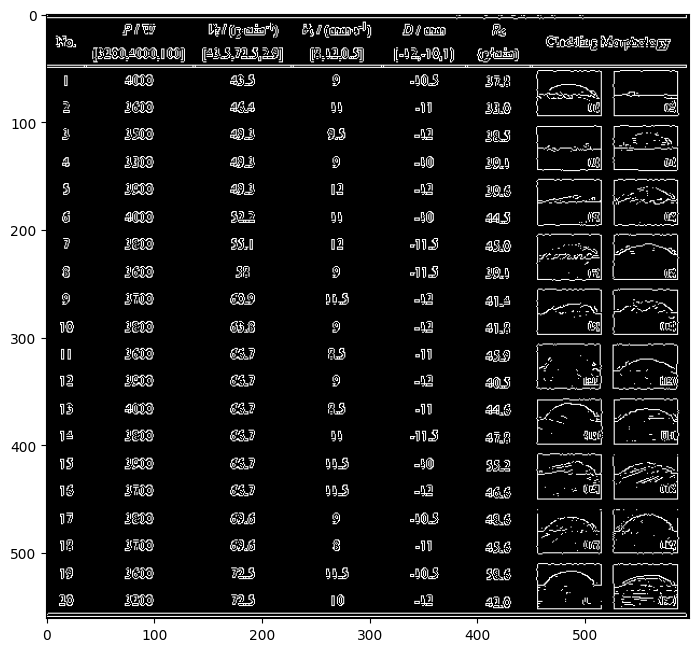

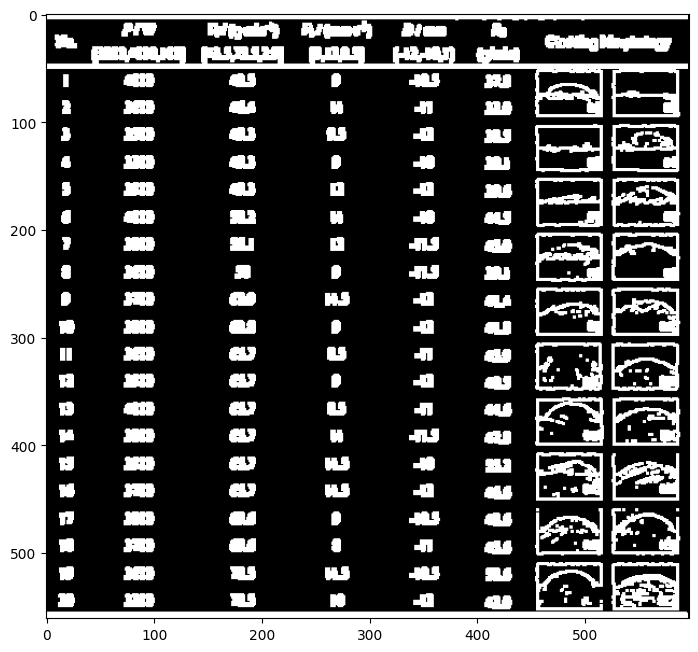

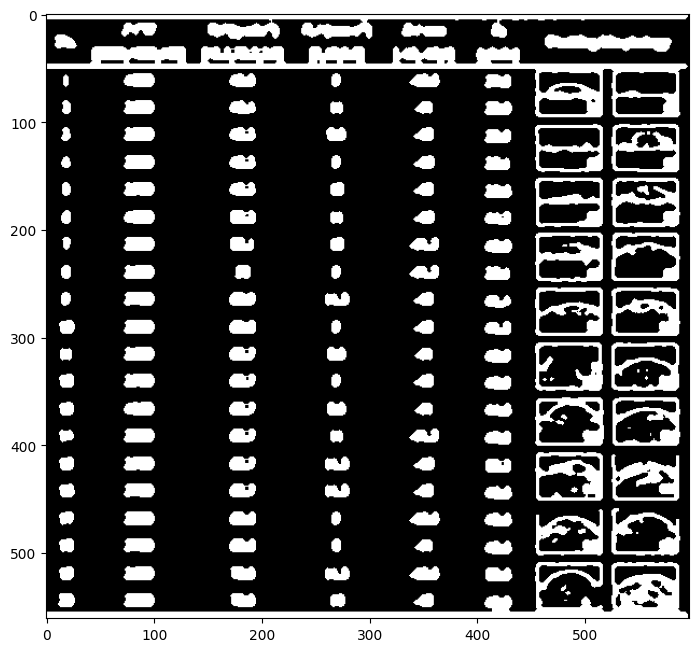

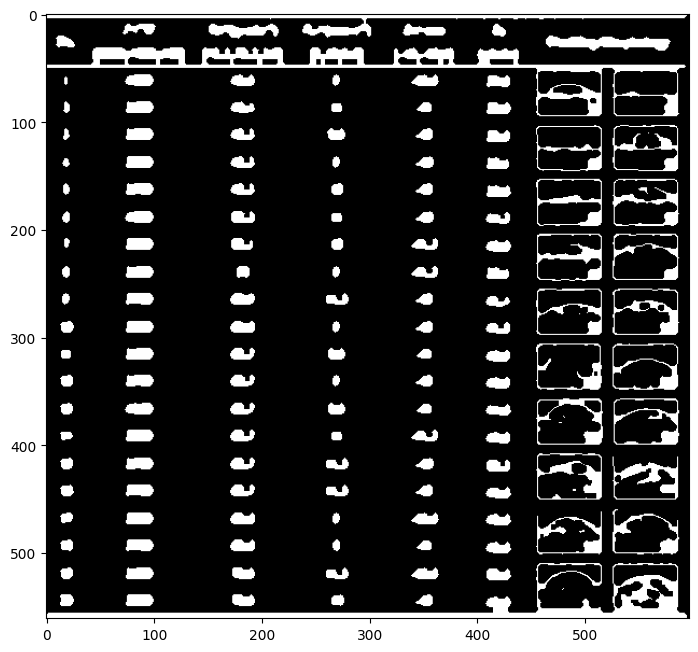

In [4]:
#边缘检测
canny = cv.Canny(img_gray, 200, 200, apertureSize = 3)
show(canny)
#sobel = cv.Sobel(img_gray, 2, dx = 0, dy = 1, ksize = 5)
#show(sobel)


#膨胀时核心的大小，去噪时领域的大小。应该注意需要 后者 > 前者。
kernel_size = 3
ridnoise_size = 5
kernel = cv.getStructuringElement(cv.MORPH_RECT,(kernel_size,kernel_size))#膨胀腐蚀的核心

#膨胀
tmp = cv.dilate(canny, kernel)
show(tmp)

#滤除噪点
tmp = cv.medianBlur(tmp, ridnoise_size)
show(tmp)

#腐蚀
tmp = cv.erode(tmp, kernel)
show(tmp)

In [5]:
lines = line_detection(tmp)[::,0,::]
lines = rectangle(lines)

#画出选中的边框直线看看
toseen = tmp.copy()
for line in lines:
    cv.line(toseen,(line[0], line[1]),(line[2],line[3]),(255,255,255),3)#开始划线
cv.namedWindow("Image Line")
cv.imshow("Image Line", toseen)
cv.waitKey(0)
cv.destroyAllWindows()

In [6]:
#以一条直线为标准需要旋转的角度
def angleOfLine(line):
    x0, y0, x1, y1 = line
    angle = abs(np.arctan((y0 - y1) / (x1 - x0)))*180/np.pi
    if (angle > 45):
        angle = 90 - angle
    print(angle)
    return angle
#平均一下需要旋转的角度
angle = np.mean([angleOfLine(line) for line in lines])
angle

0.0
0.0
0.0
0.0


<ipython-input-6-efbe398f9c8e>:4: RuntimeWarning: divide by zero encountered in int_scalars
  angle = abs(np.arctan((y0 - y1) / (x1 - x0)))*180/np.pi


0.0

In [7]:
newlines = cv.HoughLines(tmp,1,np.pi/180,250)
newlines

array([[[ 0.0000000e+00,  1.5707964e+00]],

       [[ 5.5800000e+02,  1.5707964e+00]],

       [[ 4.8000000e+01,  1.5707964e+00]],

       [[ 5.6200000e+02,  1.5533431e+00]],

       [[ 4.5600000e+02,  0.0000000e+00]],

       [[ 3.2000000e+01,  1.6057029e+00]],

       [[ 5.8600000e+02,  0.0000000e+00]],

       [[ 5.1500000e+02,  0.0000000e+00]],

       [[ 5.2700000e+02,  0.0000000e+00]],

       [[ 4.2000000e+01,  1.5882496e+00]],

       [[ 3.9000000e+01,  1.5533431e+00]],

       [[ 4.7000000e+01,  1.5358897e+00]],

       [[ 3.7000000e+01,  1.5707964e+00]],

       [[ 4.4000000e+01,  1.5358897e+00]],

       [[ 5.4000000e+01,  1.5184364e+00]],

       [[ 2.6000000e+01,  1.6231562e+00]],

       [[-2.0000000e+00,  1.6231562e+00]],

       [[ 5.5100000e+02,  1.5882496e+00]],

       [[ 5.5500000e+02,  1.5882496e+00]],

       [[ 6.0000000e+00,  1.6057029e+00]],

       [[ 6.3000000e+01,  1.5009831e+00]],

       [[ 2.2000000e+01,  1.6231562e+00]],

       [[ 5.7100000e+02,  1.5358

In [8]:
rot = cv.getRotationMatrix2D((width // 2, height // 2), -angle, 1)
cur = cv.warpAffine(img, rot, (width, height))

cv.namedWindow("Current Image")
cv.imshow("Current Image", cur)
cv.waitKey(0)
cv.destroyAllWindows()

In [9]:
#经过Hough变换后检测出多少直线
def myplay(image):
    tmp = image.copy()
    lines = cv.HoughLines(tmp,1,np.pi/180,200)#函数将通过步长为1的半径和步长为π/180的角来搜索所有可能的直线
    for line in lines:
        rho, theta = line[0,0], line[0,1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(round(x0 + 1000 * (-b)))
        y1 = int(round(y0 + 1000 * a))
        x2 = int(round(x0 - 1000 * (-b)))
        y2 = int(round(y0 - 1000 * a))
        cv.line(tmp,(x1, y1),(x2, y2),(255,255,255),2)#开始划线
    cv.imshow("image line",tmp)
    cv.waitKey(0)
    cv.destroyAllWindows()
    return lines.copy()
myplay(tmp)

array([[[ 0.0000000e+00,  1.5707964e+00]],

       [[ 5.5800000e+02,  1.5707964e+00]],

       [[ 4.8000000e+01,  1.5707964e+00]],

       [[ 5.6200000e+02,  1.5533431e+00]],

       [[ 4.5600000e+02,  0.0000000e+00]],

       [[ 3.2000000e+01,  1.6057029e+00]],

       [[ 5.8600000e+02,  0.0000000e+00]],

       [[ 5.1500000e+02,  0.0000000e+00]],

       [[ 5.2700000e+02,  0.0000000e+00]],

       [[ 4.2000000e+01,  1.5882496e+00]],

       [[ 3.9000000e+01,  1.5533431e+00]],

       [[ 4.7000000e+01,  1.5358897e+00]],

       [[ 3.7000000e+01,  1.5707964e+00]],

       [[ 4.4000000e+01,  1.5358897e+00]],

       [[ 5.4000000e+01,  1.5184364e+00]],

       [[ 2.6000000e+01,  1.6231562e+00]],

       [[-2.0000000e+00,  1.6231562e+00]],

       [[ 5.5100000e+02,  1.5882496e+00]],

       [[ 5.5500000e+02,  1.5882496e+00]],

       [[ 6.0000000e+00,  1.6057029e+00]],

       [[ 6.3000000e+01,  1.5009831e+00]],

       [[ 2.2000000e+01,  1.6231562e+00]],

       [[ 5.7100000e+02,  1.5358

In [10]:
np.set_printoptions(threshold=np.inf)

In [11]:
tmp = img.copy()
tmp[(tmp > 200) & (tmp < 240)] = 255


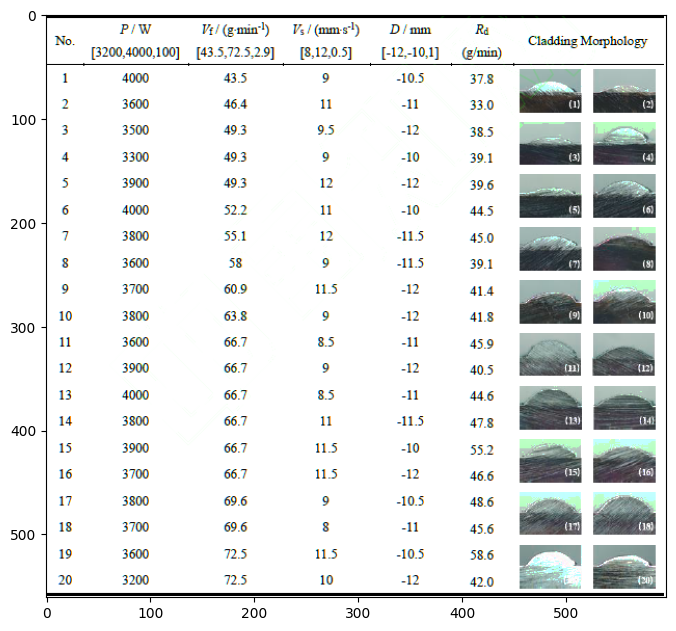

In [12]:
plt.figure(figsize = (8,10), dpi = 100)
plt.imshow(tmp)
plt.show()